<a href="https://colab.research.google.com/github/MsSaidat25/Gen-Ai/blob/main/Pretrained_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

!pip install --upgrade keras-cv keras-core tensorflow-datasets==4.9.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 47.0 MB/s eta 0:00:00
  Attempting uninstall: keras-core
    Found existing installation: keras-core 0.1.0
    Uninstalling keras-core-0.1.0:
      Successfully uninstalled keras-core-0.1.0
  Attempting uninstall: keras-cv
    Found existing installation: keras-cv 0.6.1
    Uninstalling keras-cv-0.6.1:
      Successfully uninstalled keras-cv-0.6.1


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

In [2]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 5.37k/5.37k [00:00<00:00, 6.72MB/s]


100%|██████████| 136M/136M [00:04<00:00, 32.5MB/s]


1293053/1293053 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


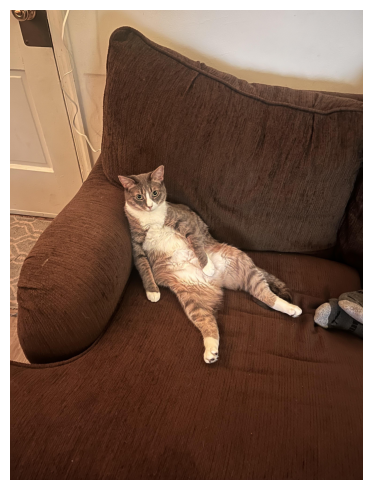

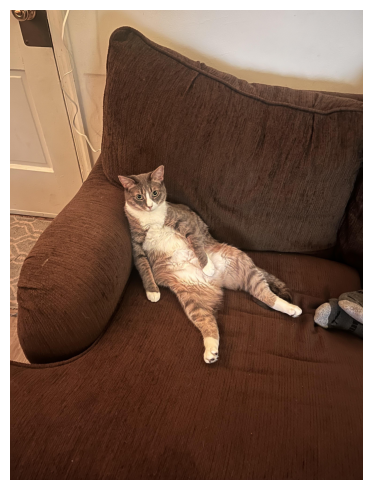

In [3]:
url = 'https://i.redd.it/twpfhcw58xgb1.jpg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [4]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [5]:
image_batch = inference_resizing(batch)

In [6]:
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
id2label = {k: v for k, v in enumerate(label_names)}

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: {'images': 'images'}
Received: inputs=Tensor(shape=(1, 640, 640, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step


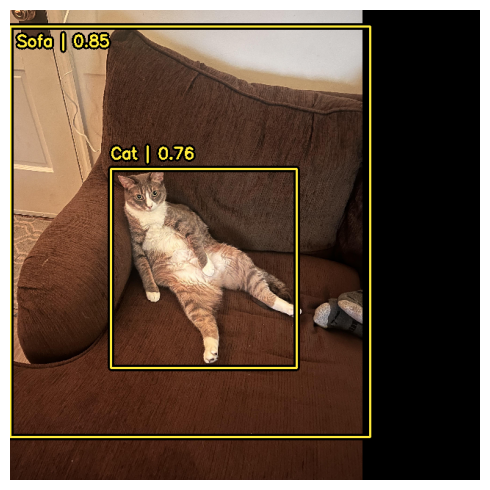

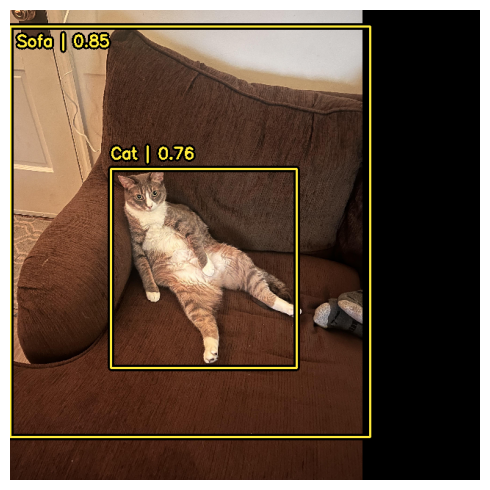

In [7]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [8]:
y_pred

{'boxes': array([[[ -0.886734,  22.110718, 491.30432 , 559.4436  ],
         [137.17674 , 216.78041 , 253.07509 , 270.2732  ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  

## Non-Max Suppression

In [9]:
url = 'https://archive.org/download/street_202308/street.jpeg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)
image_batch = inference_resizing(batch)

43419/43419 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


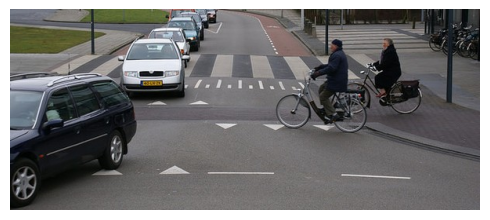

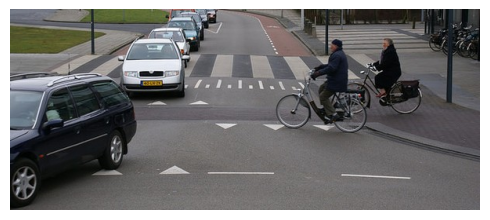

In [10]:
visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


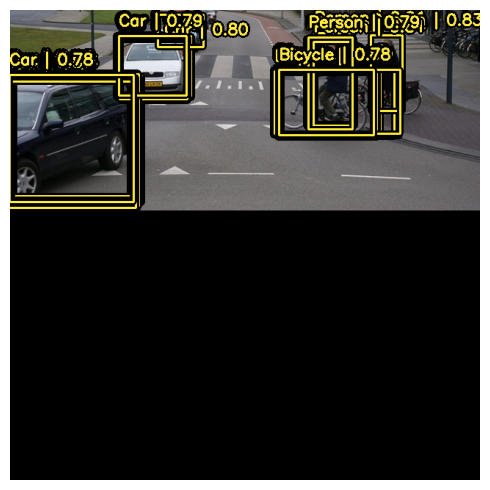

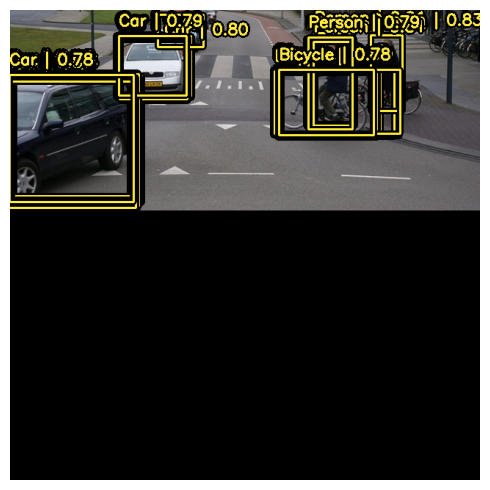

In [11]:
# The following NonMaxSuppression layer is equivalent to disabling the operation
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


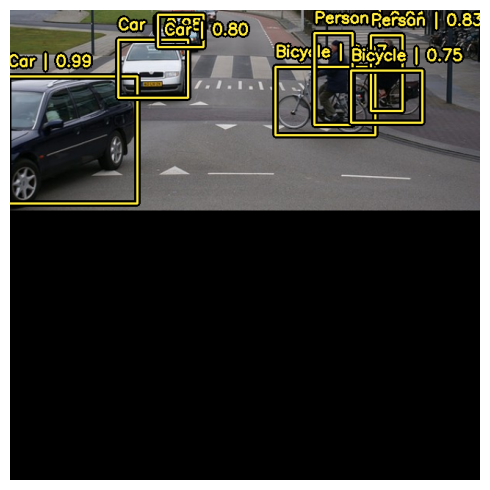

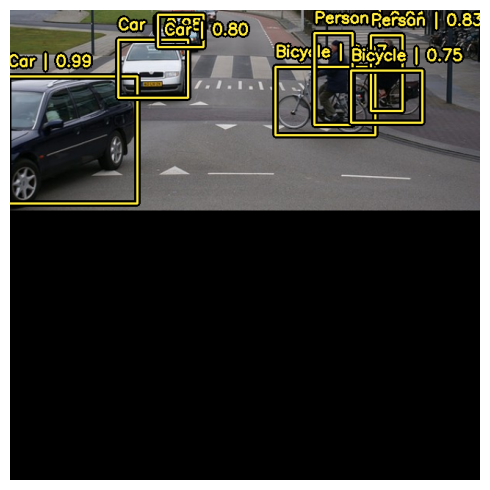

In [12]:
# Try it again!
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=vBiV-xzzlvyPsJ2Vyu3WMg&n=Pretrained+Object+Detection)